In [ ]:
import pandas as pd
import io
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import joblib

In [ ]:
df = pd.read_csv('heart.csv')

In [ ]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40.0,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49.0,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37.0,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48.0,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54.0,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [ ]:
df.head(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40.0,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49.0,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37.0,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48.0,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54.0,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39.0,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45.0,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
7,54.0,M,ATA,110,208,0,Normal,142,N,0.0,Up,0
8,37.0,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
9,48.0,F,ATA,120,284,0,Normal,120,N,0.0,Up,0


In [ ]:
df.tail()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
921,45.0,NaN,TA,110,264,0,Normal,132,N,1.2,Flat,1
922,68.0,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
923,57.0,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
924,57.0,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1
925,NaN,M,NAP,138,175,0,Normal,173,N,0.0,Up,0


In [ ]:
df.tail(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
916,63.0,M,ASY,140,187,0,LVH,144,Y,4.0,Up,1
917,63.0,F,ASY,124,197,0,Normal,136,Y,0.0,Flat,1
918,41.0,M,ATA,120,157,0,Normal,182,N,0.0,Up,0
919,59.0,M,ASY,164,176,1,LVH,90,N,1.0,Flat,1
920,57.0,F,ASY,140,241,0,Normal,123,Y,0.2,Flat,1
921,45.0,NaN,TA,110,264,0,Normal,132,N,1.2,Flat,1
922,68.0,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
923,57.0,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
924,57.0,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1
925,NaN,M,NAP,138,175,0,Normal,173,N,0.0,Up,0


In [ ]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,912.000000,926.000000,926.000000,926.000000,926.000000,926.000000,926.000000
mean,53.458333,132.344492,198.942765,0.231102,136.766739,0.884557,0.551836
std,9.459279,18.470345,108.960553,0.421765,25.390222,1.064772,0.497575
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,174.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,222.000000,0.000000,138.000000,0.550000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,155.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [ ]:
df['Age'].describe()

,Age
count,912.000000
mean,53.458333
std,9.459279
min,28.000000
25%,47.000000
50%,54.000000
75%,60.000000
max,77.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 926 entries, 0 to 925
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             912 non-null    float64
 1   Sex             914 non-null    object 
 2   ChestPainType   926 non-null    object 
 3   RestingBP       926 non-null    int64  
 4   Cholesterol     926 non-null    int64  
 5   FastingBS       926 non-null    int64  
 6   RestingECG      926 non-null    object 
 7   MaxHR           926 non-null    int64  
 8   ExerciseAngina  926 non-null    object 
 9   Oldpeak         926 non-null    float64
 10  ST_Slope        926 non-null    object 
 11  HeartDisease    926 non-null    int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 86.9+ KB


In [ ]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [ ]:
df.HeartDisease.value_counts()

,count
HeartDisease,
1,511
0,415


<ipython-input-12-21820dffcdc8>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='HeartDisease', data=df, palette='bwr')


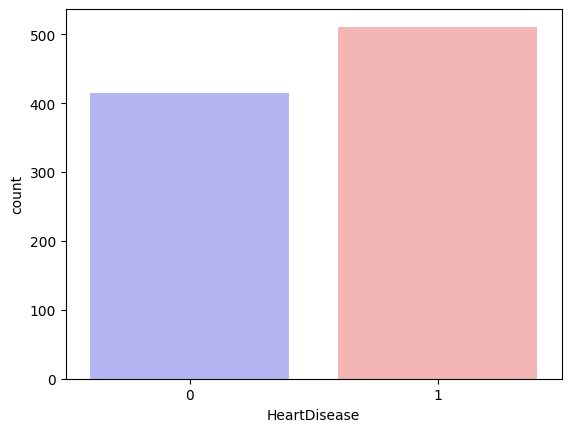

In [ ]:
sns.countplot(x='HeartDisease', data=df, palette='bwr')
plt.show()

In [ ]:
#now lets count our target
countNoDisease = len(df[df.HeartDisease == 0])
countDisease = len(df[df.HeartDisease == 1])
print("Percentage of Patients Haven't Disease : {:2f} %".format(countNoDisease/(len(df.HeartDisease))*100))
print("Percentage of Patients Have Disease : {:2f} %".format(countDisease/(len(df.HeartDisease))*100))

Percentage of Patients Haven't Disease : 44.816415 %
Percentage of Patients Have Disease : 55.183585 %


<ipython-input-14-3079dffa0f84>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sex', data=df, palette='mako_r')


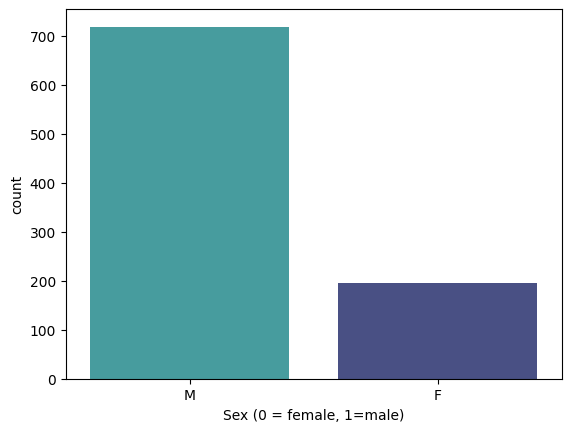

In [ ]:
sns.countplot(x='Sex', data=df, palette='mako_r')
plt.xlabel("Sex (0 = female, 1=male)")
plt.show()

In [ ]:
countFemale = len(df[df.Sex == 'F'])
countMale = len(df[df.Sex == 'M'])
print("Percentage of Female Patients: {:.2f} %".format((countFemale/(len(df.Sex))*100)))
print("Percentage of Male Patients: {:.2f} %".format((countMale/(len(df.Sex))*100)))

Percentage of Female Patients: 21.06 %
Percentage of Male Patients: 77.65 %


In [ ]:
df.groupby('HeartDisease').mean(numeric_only=True)

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak
HeartDisease,,,,,,
0,50.490196,130.045783,227.079518,0.106024,148.019277,0.403133
1,55.861111,134.211350,176.091977,0.332681,127.628180,1.275538


<Axes: ylabel='count'>

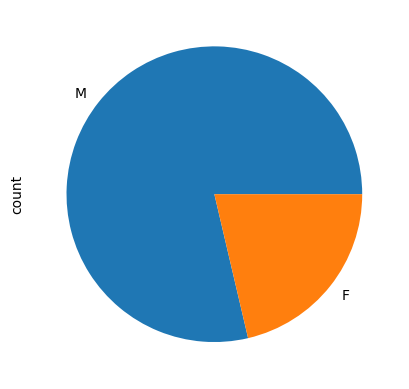

In [ ]:
df['Sex'].value_counts().plot.pie()

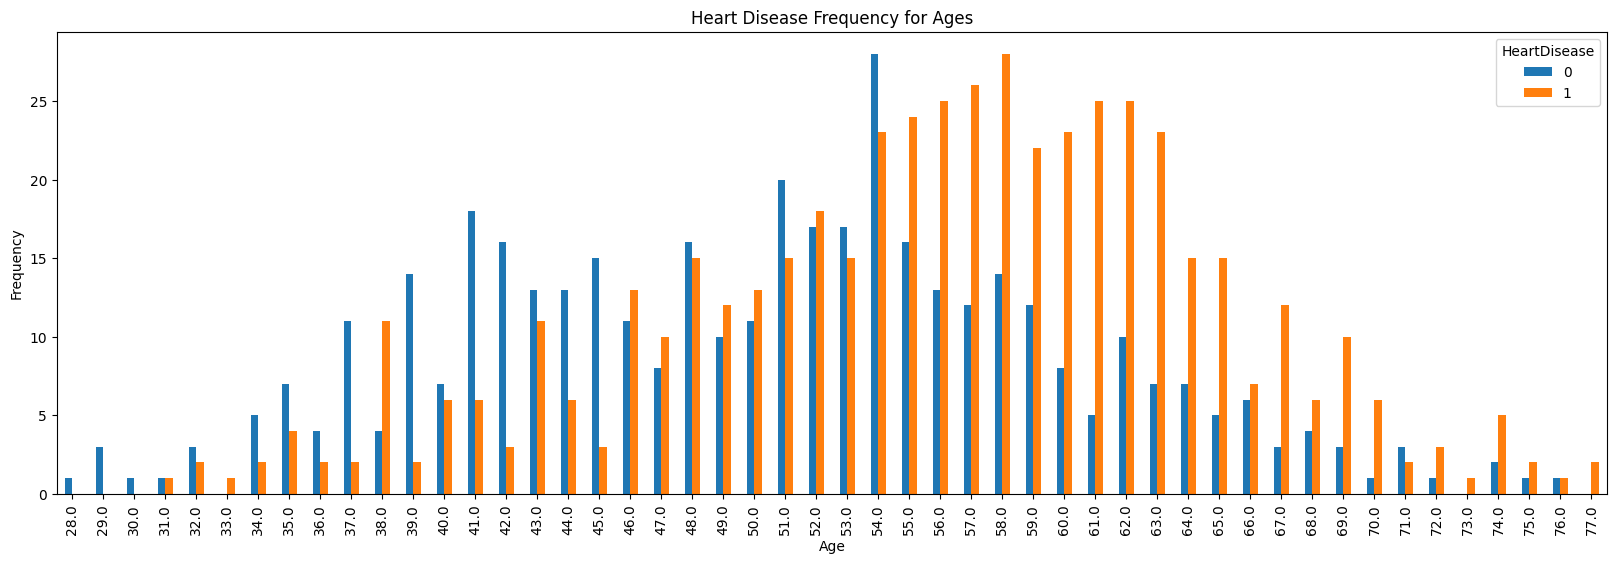

In [ ]:
pd.crosstab(df.Age,df.HeartDisease).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('heartDiseaseAndAges.png')
plt.show()

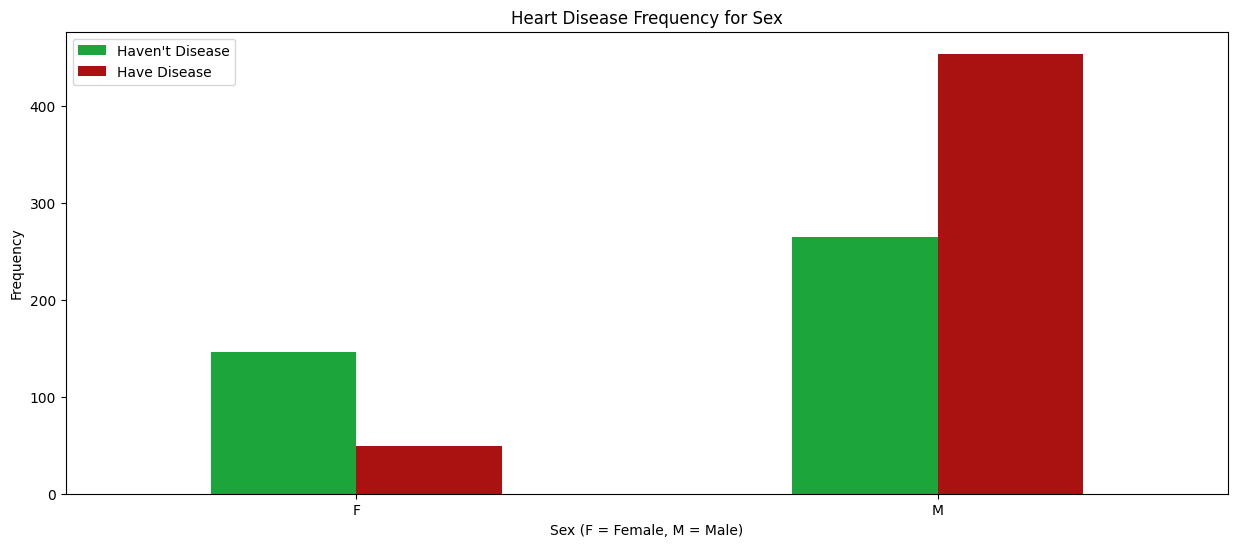

In [ ]:
pd.crosstab(df.Sex,df.HeartDisease).plot(kind="bar",figsize=(15,6),color=['#1CA53B','#AA1111'])
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex (F = Female, M = Male)')
plt.xticks(rotation=0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

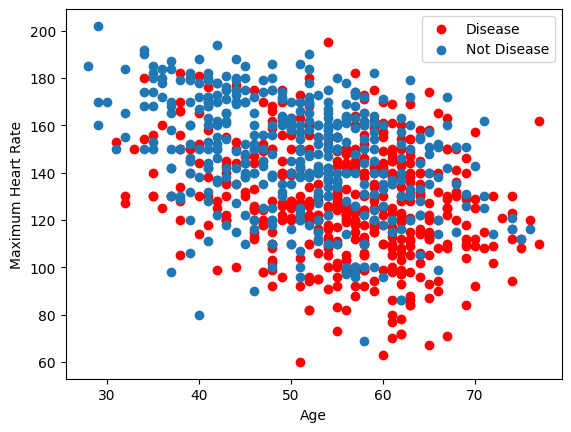

In [ ]:
plt.scatter(x=df.Age[df.HeartDisease==1], y=df.MaxHR[(df.HeartDisease==1)], c="red")
plt.scatter(x=df.Age[df.HeartDisease==0], y=df.MaxHR[(df.HeartDisease==0)])
plt.legend(["Disease", "Not Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show()

<Axes: >

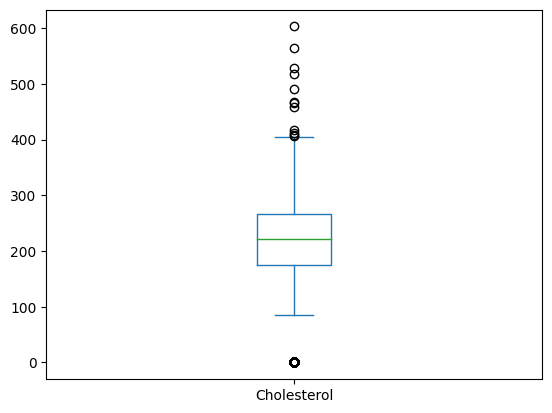

In [ ]:
df['Cholesterol'].plot(kind="box")

<Axes: title={'center': 'Age'}, xlabel='Sex'>

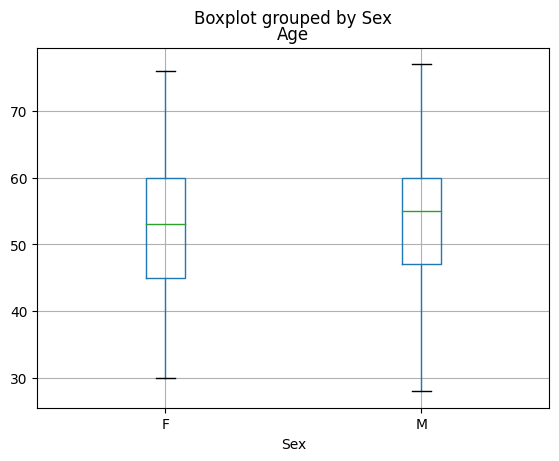

In [ ]:
df.boxplot(column='Age', by='Sex')

In [ ]:
#Transformation for dummy variables:
a = pd.get_dummies(df['Cholesterol'], prefix= "cp")
b = pd.get_dummies(df['Sex'], prefix ="thal")
c = pd.get_dummies(df['RestingECG'], prefix="slope")
d = pd.get_dummies(df['ExerciseAngina'], prefix="slope")
e = pd.get_dummies(df['ST_Slope'], prefix="slope")

frames= [df,a,b,c,d,e]
dfDummy = pd.concat(frames,axis=1)
dfDummy.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,...,thal_F,thal_M,slope_LVH,slope_Normal,slope_ST,slope_N,slope_Y,slope_Down,slope_Flat,slope_Up
0,40.0,M,ATA,140,289,0,Normal,172,N,0.0,...,False,True,False,True,False,True,False,False,False,True
1,49.0,F,NAP,160,180,0,Normal,156,N,1.0,...,True,False,False,True,False,True,False,False,True,False
2,37.0,M,ATA,130,283,0,ST,98,N,0.0,...,False,True,False,False,True,True,False,False,False,True
3,48.0,F,ASY,138,214,0,Normal,108,Y,1.5,...,True,False,False,True,False,False,True,False,True,False
4,54.0,M,NAP,150,195,0,Normal,122,N,0.0,...,False,True,False,True,False,True,False,False,False,True


In [ ]:
#Delete the categorial variables:
dfDummy.drop(columns=['ChestPainType','Sex','RestingECG','ExerciseAngina','ST_Slope'])

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,cp_0,cp_85,cp_100,...,thal_F,thal_M,slope_LVH,slope_Normal,slope_ST,slope_N,slope_Y,slope_Down,slope_Flat,slope_Up
0,40.0,140,289,0,172,0.0,0,False,False,False,...,False,True,False,True,False,True,False,False,False,True
1,49.0,160,180,0,156,1.0,1,False,False,False,...,True,False,False,True,False,True,False,False,True,False
2,37.0,130,283,0,98,0.0,0,False,False,False,...,False,True,False,False,True,True,False,False,False,True
3,48.0,138,214,0,108,1.5,1,False,False,False,...,True,False,False,True,False,False,True,False,True,False
4,54.0,150,195,0,122,0.0,0,False,False,False,...,False,True,False,True,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
921,45.0,110,264,0,132,1.2,1,False,False,False,...,False,False,False,True,False,True,False,False,True,False
922,68.0,144,193,1,141,3.4,1,False,False,False,...,False,True,False,True,False,True,False,False,True,False
923,57.0,130,131,0,115,1.2,1,False,False,False,...,False,True,False,True,False,False,True,False,True,False
924,57.0,130,236,0,174,0.0,1,False,False,False,...,True,False,True,False,False,True,False,False,True,False


In [ ]:
#Checking for double values:
x= df.shape[0]
df = df.drop_duplicates()
y=df.shape[0]

In [ ]:
print("Avant l'operation:",x,"aprés l'operation:",y,'suppression',x-y,'doublons')

Avant l'operation: 926 aprés l'operation: 918 suppression 8 doublons


In [ ]:
#Checking for missing values:
df.isnull()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
921,False,True,False,False,False,False,False,False,False,False,False,False
922,False,False,False,False,False,False,False,False,False,False,False,False
923,False,False,False,False,False,False,False,False,False,False,False,False
924,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
df.isnull().sum()

,0
Age,14
Sex,12
ChestPainType,0
RestingBP,0
Cholesterol,0
FastingBS,0
RestingECG,0
MaxHR,0
ExerciseAngina,0
Oldpeak,0


In [ ]:
#so we have a missing values so we have two choices :
#1: delete the missing values if they are little
#df1=df.dropna()
#df1.shape()
#df1.isnull().sum()
#2: imputing it
Age= df['Age']
Age_mean = Age.mean()
print(Age_mean)
df.Age.fillna(Age_mean, inplace=True)
df.isnull().sum()

53.5287610619469


<ipython-input-29-37ca1b074329>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Age.fillna(Age_mean, inplace=True)


,0
Age,0
Sex,12
ChestPainType,0
RestingBP,0
Cholesterol,0
FastingBS,0
RestingECG,0
MaxHR,0
ExerciseAngina,0
Oldpeak,0


In [ ]:
df.Sex = df.Sex.fillna("Unknown")
print(df.isnull().sum())

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


<ipython-input-30-bc759fc50c32>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Sex = df.Sex.fillna("Unknown")


In [ ]:
df.to_csv('/content/CleanData.csv',index=False)

In [ ]:
data = pd.read_csv("CleanData.csv")

In [ ]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40.0,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49.0,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37.0,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48.0,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54.0,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


# **Encode the categorical features**

In [ ]:
label_encoders = {}
categorical_features = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

# Encode each categorical feature
for feature in categorical_features:
    data[feature] = data[feature].astype(str)
    le = LabelEncoder()
    data.loc[:, feature] = le.fit_transform(data[feature])
    label_encoders[feature] = le


# Print the encoded data sample
print("Encoded Data Sample:")
print(data[categorical_features].head())

# Print the mapping for each feature
for feature in categorical_features:
    print(f"\nMapping for {feature}:")
    mapping = dict(zip(label_encoders[feature].classes_, label_encoders[feature].transform(label_encoders[feature].classes_)))
    print(mapping)


Encoded Data Sample:
  Sex ChestPainType RestingECG ExerciseAngina ST_Slope
0   1             1          1              0        2
1   0             2          1              0        1
2   1             1          2              0        2
3   0             0          1              1        1
4   1             2          1              0        2

Mapping for Sex:
{'F': 0, 'M': 1, 'Unknown': 2}

Mapping for ChestPainType:
{'ASY': 0, 'ATA': 1, 'NAP': 2, 'TA': 3}

Mapping for RestingECG:
{'LVH': 0, 'Normal': 1, 'ST': 2}

Mapping for ExerciseAngina:
{'N': 0, 'Y': 1}

Mapping for ST_Slope:
{'Down': 0, 'Flat': 1, 'Up': 2}


In [ ]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40.0,1,1,140,289,0,1,172,0,0.0,2,0
1,49.0,0,2,160,180,0,1,156,0,1.0,1,1
2,37.0,1,1,130,283,0,2,98,0,0.0,2,0
3,48.0,0,0,138,214,0,1,108,1,1.5,1,1
4,54.0,1,2,150,195,0,1,122,0,0.0,2,0


# **Separate features and target**

In [ ]:
x= data.drop(columns=['HeartDisease'])
y= data['HeartDisease']

# **Split the Data into training and test**

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

# **Standardize the numerical features**

In [ ]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

# **The Model Neural Network**

In [ ]:
# Define the model
model = Sequential([
    Dense(64, input_shape=(x_train.shape[1],), activation='relu'),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Train the model
history = model.fit(x_train, y_train, epochs=50, batch_size=32, validation_split=0.2)


Epoch 1/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.4971 - loss: 0.7124 - val_accuracy: 0.7075 - val_loss: 0.6438
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6022 - loss: 0.6614 - val_accuracy: 0.7619 - val_loss: 0.5899
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7105 - loss: 0.5931 - val_accuracy: 0.7687 - val_loss: 0.5267
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7858 - loss: 0.5143 - val_accuracy: 0.7687 - val_loss: 0.4804
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8033 - loss: 0.4664 - val_accuracy: 0.8027 - val_loss: 0.4476
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8091 - loss: 0.4373 - val_accuracy: 0.8095 - val_loss: 0.4405
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7904 - loss: 0.4399 - val_accuracy: 0.8231 - val_loss: 0.4314
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8176 - loss: 0.4361 - val_accuracy: 0.8231 - val_loss

In [ ]:
# Evaluate the model
y_pred = (model.predict(x_test) > 0.5).astype(int)

# Print accuracy, classification report, and confusion matrix
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Accuracy: 0.8695652173913043
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.87      0.85        77
           1       0.90      0.87      0.89       107

    accuracy                           0.87       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.87      0.87      0.87       184

Confusion Matrix:
 [[67 10]
 [14 93]]


In [ ]:
joblib.dump(model,'heart_disease_model.pkl')
joblib.dump(label_encoders, 'label_encoders.pkl')

['label_encoders.pkl']

In [ ]:
model_test = joblib.load('heart_disease_model.pkl')
label_encoders_test = joblib.load('label_encoders.pkl')

/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 10 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [ ]:
def encode_features(input_data, encoders):
    encoded_data = {}
    for feature, value in input_data.items():
        if feature in encoders:
            encoded_data[feature] = encoders[feature].transform([value])[0]
        else:
            encoded_data[feature] = value
    return encoded_data


In [ ]:
# Example input data
input_data = {
    'Age': 63,
    'Sex': 'M',  # Original value
    'ChestPainType': 'ASY',  # Original value
    'RestingBP': 150,
    'Cholesterol': 223,
    'FastingBS': 0,
    'RestingECG': 'Normal',  # Original value
    'MaxHR': 115,
    'ExerciseAngina': 'N',  # Original value
    'Oldpeak': 0.0,
    'ST_Slope': 'Flat'  # Original value
}

# Encode the input data
encoded_input = encode_features(input_data, label_encoders_test)

# Convert encoded input data to a numpy array
features = np.array([list(encoded_input.values())])

# Standardize the features using the same scaler used during training
features = scaler.transform(features)

# Make a prediction
prediction_proba = model_test.predict(features)
prediction = (prediction_proba > 0.5).astype(int)  # Apply threshold to get class labels

print(f'Predicted class: {prediction[0][0]}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Predicted class: 1


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
